# Python 與機器學習 - 分群

## 郭耀仁

## 分群問題

- 處理沒有標籤的資料
- 沒有對與錯
- 組內差異小、組間差異大
- 以觀測值之間的距離作為度量
    - 歐幾里德距離, 曼哈頓距離, ...

## 分群問題（2）

- 鯊魚
- 鯨魚
- 貓

## 分群問題（3）

- 性別（2 群）
- 血型（4 群）
- 星座（12 群）

## 分群問題（4）

- 與分類問題的比較：

$$\text{Training set: } (x_i, y_i)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 20)
x_points_len = int(len(x_points) / 2)
y_minus = np.array(random.choices(np.arange(1, 2, 0.01), k = x_points_len)) - x_points[:x_points_len]
y_plus = np.array(random.choices(np.arange(4, 6, 0.01), k = x_points_len)) - x_points[x_points_len:]
plt.scatter(x_points[:x_points_len], y_minus, marker = '_', s = 200)
plt.scatter(x_points[x_points_len:], y_plus, marker = '+', c = 'r', s = 200)
plt.plot(x1_arr, 3 - x1_arr, c = 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Classification")

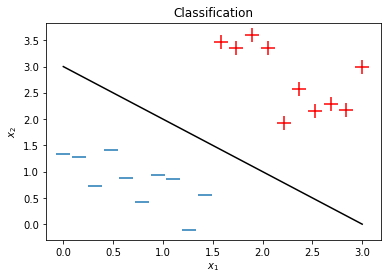

In [2]:
plt.show()

## 分群問題（5）

- 與分類問題比較

$$\text{Training set: } x_i$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 10)
x_points_len = int(len(x_points) / 2)
random.seed(123)
y_minus = np.array(random.choices(np.arange(1, 2, 0.01), k = x_points_len)) - x_points[:x_points_len]
y_plus = np.array(random.choices(np.arange(4, 6, 0.01), k = x_points_len)) - x_points[x_points_len:]
fig, ax = plt.subplots()
ax.scatter(x_points[:x_points_len], y_minus, s = 200, c = 'r')
ax.scatter(x_points[x_points_len:], y_plus, s = 200, c = 'b')
circle1 = plt.Circle((0.5, 0.5), 1, color = 'r', fill = False)
circle2 = plt.Circle((2.5, 2.2), 1.2, color = 'b', fill = False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(-0.5, 4)
ax.set_ylim(-0.5, 4)
ax.set_title("Classification")

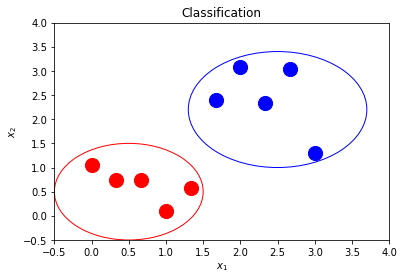

In [4]:
plt.show()

## 分群問題（6）

- K-means 分群方法的成本函數

$$c: \; \text{分群的索引值}$$
$$\mu_k: \; \text{不同分群的中心點}$$
$$\mu_c: \; \text{計算距離後收斂的不同分群中心點}$$
$$\text{minimize:} \; J(c, \mu_k) = \frac{1}{m}\sum_{i = 1}^{m}(x_i-\mu_c)^2$$

## 分群問題（7）

- K-means 演算的方式

![Stanford.edu：K-Means 視覺化](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

## 分群問題（8）

- 初始 $K$ 個中心點的位置對結果有決定性的影響

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'k')
plt.scatter(x_arr[3:7], y_arr_2, s = 100, c = 'k')
plt.scatter(x_arr[7:], y_arr_3, s = 100, c = 'k')

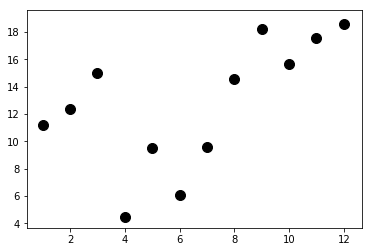

In [6]:
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'r')
plt.scatter(x_arr[3:7], y_arr_2, s = 100, c = 'g')
plt.scatter(x_arr[7:], y_arr_3, s = 100, c = 'b')
plt.plot(2, 14, marker = 'X', markersize = 20, c = 'r')
plt.plot(5, 8, marker = 'X', markersize = 20, c = 'g')
plt.plot(10, 18, marker = 'X', markersize = 20, c = 'b')

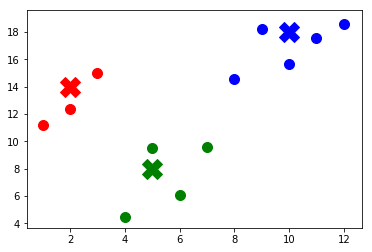

In [8]:
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'r')
plt.scatter(x_arr[[3, 5]], y_arr_2[[0, 2]], s = 100, c = 'g')
plt.scatter(x_arr[[4, 6]], y_arr_2[[1, 3]], s = 100, c = 'b')
plt.scatter(x_arr[7:], y_arr_3, s = 100, c = 'r')
plt.plot(6, 16, marker = 'X', markersize = 20, c = 'r')
plt.plot(5, 5, marker = 'X', markersize = 20, c = 'g')
plt.plot(6, 9, marker = 'X', markersize = 20, c = 'b')

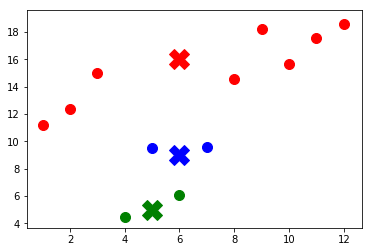

In [10]:
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, s = 100, c = 'r')
plt.scatter(x_arr[3:7], y_arr_2, s = 100, c = 'r')
plt.scatter(x_arr[7:10], y_arr_3[:3], s = 100, c = 'g')
plt.scatter(x_arr[10:], y_arr_3[3:], s = 100, c = 'b')
plt.plot(3, 10, marker = 'X', markersize = 20, c = 'r')
plt.plot(9, 16, marker = 'X', markersize = 20, c = 'g')
plt.plot(11.5, 18, marker = 'X', markersize = 20, c = 'b')

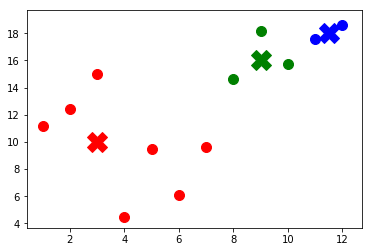

In [12]:
plt.show()

## 分群問題（9）

- 透過多進行幾次初始化 $K$ 個中心點的位置來進行校正
- 從多次的分群中選擇一個 $J(c, \mu_k)$ 最小的分群

## 分群問題（10）

- 如何選擇一個合適的 $K$？
    - 性別（2 群）
    - 血型（4 群）
    - 星座（12 群）
    - 出生月日（366 群）
    - DNA（75+ 億群）

## 分群問題（11）

- 利用陡坡圖（Scree plot）尋找手肘點（Elbow point）

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 1, 0.1)
y1 = -np.log(x)
plt.plot(x, y1, marker = 's')
plt.plot(x[[2, 3]], y1[[2, 3]], c = 'r', marker = 'X', lw = 0, markersize = 10)
plt.xticks(x, range(1, 10))
plt.xlabel("Number of clusters")
plt.ylabel("$J(c, \mu_k)$")

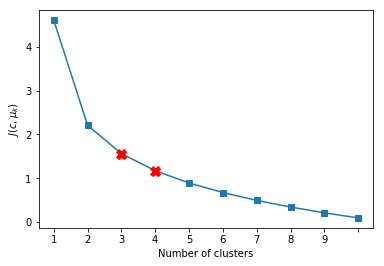

In [14]:
plt.show()